# Classification vs. Regression / Metrics / Linear Regression
Tutorial created by Divya

## Overview
This week we'll be covereing what it means to have a classification model and a regression model, some basic metrics to determine the performance of a model, and linear regression. 

## Setting up
For this tutorial, we'll be using pandas and scikit-learn again. (You should already have these installed, but if not, run these commands first!)
- Install Pandas with `pip install pandas`
- Install scikit-learn with `pip install scikit-learn`

And let's import these as follows:

In [1]:
import pandas as pd # remember we're saying that pd is shorthand for pandas

import sklearn

# Classification vs. Regression

## Classification

What is classification?
Classification models are when the goal is to predict a label or category for each data point
Examples: 
- iris flowers (from last week!)
- is this picture a cat or not?
- __what examples can you guys think of?__ 

Notice how in classification, we work with _discrete_ data - i.e. we have a set of _separate_ categories. 

### Real World Example
#### Is an email spam or not?

Say we had some data of emails and their labels (is spam or is not spam). This means that each email is a data point with some features and a label. Using machine learning, we can predict an email's label (is it spam or not) based on its features. 

__What are some examples of what these emails' features could be?__

## Regression

What is regression?
Regression models are when the goal is to predict a continuous value for each data point
Examples:
- california house prices (from last week!)
- student enrollment at your schools
- __what examples can you guys think of?__

Notice how in regression, we work with _continuous_ data - i.e. values that can be _any_ number along a range. 

### Real World Example
#### Predicting House Prices

Say we had some data on houses and their prices. In this case, each house is a data point with some features and a price. Using machine learning, we can predict a house's price based on these features. 

__What are some examples of what these houses' features could be?__

### Classification Example

Let's take a brief look at the iris dataset from last week:

In [16]:
# importing various functions we'll need
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load dataset 
iris = load_iris()

# create X - features and y - labels
X, y = iris.data, iris.target

# print a few rows from y
print("a few rows from y", y[0:200:25]) # notice that these are distinct values (each number represents a species of iris flower)

# (remember that the meaning of the syntax above is start:stop:step)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# make predictions for test set
predictions = model.predict(X_test)

# print some of these predictions
print("some of these predictions", predictions[0:6])

# calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("classification accuracy: ", accuracy*100)

a few rows from y [0 0 1 1 2 2]
some of these predictions [1 0 2 1 1 0]
classification accuracy:  100.0


Notice how we use accuracy as a metric to measure how well our model is performing. 
__Any ideas on why we use accuracy? What is being compared with our predictions?__ 

### Regression Example

Let's take a brief look at the California House Prices dataset from last week:

In [17]:
# importing various functions we'll need
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# load dataset 
housing = fetch_california_housing()

# create X - features and y - labels
X, y = housing.data, housing.target

# print a few rows from y
print("a few rows from y", y[0:200:25]) # notice that these are continous values within the range of house prices

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a linear regression model
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# make predictions for test set
predictions = model_reg.predict(X_test)

# print some of these predictions
print("some of these predictions", predictions[0:6])

# calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("regression mean squared errorr: ", mse) # what is mean squared error? 

a few rows from y [4.526 1.075 1.719 1.775 2.578 3.373 2.701 1.286]
some of these predictions [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807 2.01073856]
regression mean squared errorr:  0.5305677824766757


# Metrics

Metrics refer to the way we measure our performance of a model. They're the answers to _how well is our model performing?_ 

So we saw that classfication and regression have different metrics to measure the performance of a model.

We used accuracy for classfication and mean squared error for regression. __Why can't we swtich these around?__

## Classification Metrics

### Accuracy
Definition: # correct predictions / total predictions
Meaning: how many predictions were correct out of all the predictions we made.
When to use: good to use for _balanced_ datasets (there are a similar number of data points in each category).
** High is good. **

We can use sklearn's `accuracy_score` function to calculate the accuracy of our model.
`accuracy = accuracy_score(y_test, predictions)`

### Precision, Recall, F1
Precision: # true positives / true positives + false positives
Recall: # true positives / true positives + false negatives
F1: 2 * (precision * recall) / (precision + recall)

Precision Meaning: how many positive predictions were correct out of all positive predictions made. 
Recall Meaning: of all data points that actually belong to a certain class, how many did the model correctly predict?
F1 Meaning: the balance between precision and recall

** For precision, high is good. **
** For recall, high is good. **
** For F1, high is good. **

When to use: good to use for _imbalanced_ datasets (there are a different number of data points in each category).

We can use sklearn's `precision_score`, `recall_score`, and `f1_score` functions to calcuate these metrics

### Confusion Matrix
Definition: a table that shows the number of true positives, true negatives, false positives, and false negatives

True Positives: how many did the model predict were __class A__ and were __actually class A__
True Negatives: how many did the model predict were __class B__ and were __actually class B__

False Positives: how many did the model predict were __class A__ and were __actually class B__
False Negatives: how many did the model predict were __class B__ and were __actually class A__

We can use sklearn's `confusion_matrix` function to calcuate these metrics and seaborn and matplotlib to visualize them.

accuracy:  0.8333333333333334
precision:  1.0
recall:  0.75
f1:  0.8571428571428571


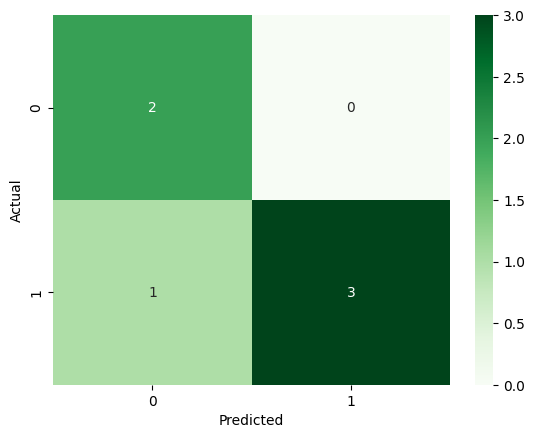

In [32]:
# let's create some sample results to illustrate using these metrics
y_true = [1, 0, 1, 1, 0, 1]  # actual labels
y_pred = [1, 0, 0, 1, 0, 1]  # predicted labels (model's predictions)

# accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("accuracy: ", accuracy)

# precision
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print("precision: ", precision)

# recall
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print("recall: ", recall)

# f1
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("f1: ", f1)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Regression Metrics

### Mean Squared Error (MSE)
Definition: the average of the squared differences between the predicted and actual values
Meaning: how far off our predictions are from the actual values (squaring to account for positive / negative errors).
** Low is good. **

We can use sklearn's `mean_squared_error` function to calcuate this metric

### Root Mean Squared Error (RMSE)
Definition: the square root of MSE
Meaning: how far off our predictions are from the actual values - but we are back in the original units.
** Low is good. **

We can use np's `sqrt` function and sklearn's `mean_squared_error` function to calcuate this metric

### R^2
Definition: the coefficient of determination
Meaning: how well our predictions fit the actual values.
** High is good. **

We can use sklearn's `r2_score` function to calcuate this metric

### Mean Absolute Error (MAE)
Definition: average absolute difference between predicted and actual values
Meaning: how far off our predictions are from the actual values (taking absolute value to account for positive / negative errors).
** Low is good. **

We can use sklearn's `mean_absolute_error` function to calcuate this metric

In [34]:
# let's create some sample results to illustrate using these metrics

y_true = [3.0, -0.5, 2.0, 7.0] # actual values
y_pred = [2.5, 0.0, 2.0, 8.0] # predicted values (model's predictions)

# mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
print("mean squared error: ", mse)

# root mean squared error
from sklearn.metrics import mean_squared_error
import numpy as np # we introduced this library a few weeks ago

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("root mean squared error: ", rmse)

# r^2
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print("r^2: ", r2)

# mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print("mean absolute error: ", mae)

mean squared error:  0.375
root mean squared error:  0.6123724356957945
r^2:  0.9486081370449679
mean absolute error:  0.5


# Linear Regression

## What is Linear Regression?

Linear Regression is a type of regression model that predicts a continuous outcome by drawing a line of best fit through data points - you've probably done this in your math classes.

Goal: To find the best-fit line that minimizes the differences (errors) between actual values and predicted values.

Examples: 
- price of house
- test score vs. hours studied
- __what other examples can we use _linear_ regression for?__

## Math

Equation: y = mx + b
where: 
* y: predicted value
* x: feature value
* m: slope
* b: y-intercept

## Intuition: how does linear regression work?

The model must find the best values of m and b such that the line best fits the data points. 

### Process
1. Start with a guess for the line (random m and b) 
2. Calcualte error: For each data point, calculate the difference between the actual value and the predicted value. 
3. Adjust the line: Update m and b to minimize this error.
4. Repeat until the error is minimized (changing m and b does not reduce error anymore).

In [35]:
# let's use the iris dataset again and see if we can predict petal length from sepal length

# imports
from sklearn.datasets import load_iris
import pandas as pd

# load data, split data, create linear regression model, train model, and make predictions
iris = load_iris()

# create a dataframe
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# select only petal length and sepal length columns
data = data[["sepal length (cm)", "petal length (cm)"]]

# this is what the data looks like now
data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [38]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# split data into features and labels
X = data[['sepal length (cm)']]  # features
y = data['petal length (cm)']     # target

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R-squared score to measure model performance
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

R-squared score:  0.8181245472591437


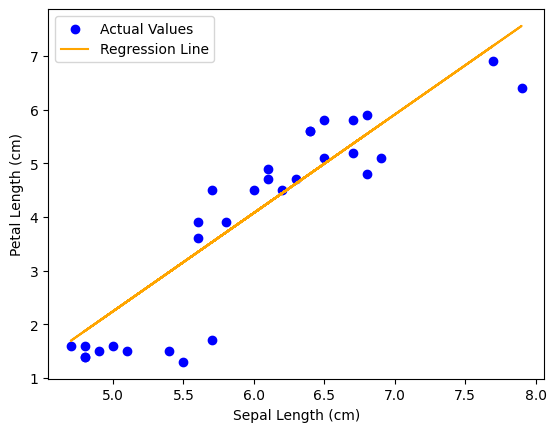

In [50]:
# visualize the data results

# imports
import matplotlib.pyplot as plt

# plotting test data and the model's predictions
plt.scatter(X_test, y_test, color="blue", label="Actual Values")
plt.plot(X_test, y_pred, color="orange", label="Regression Line")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

## Exercises

##### Exercise 1: Classification or Regression?
a. predicting whether a Netflix subscriber will watch the new comedy movie that was just added
b. predicting someone's height based on their age
c. predicting the type of car a person will buy based on their budget
d. predicting whether a person will get a loan based on their credit score


##### Exercise 2: Modifying Features in the DataFrame to see how various Metrics Change
Drop a few columns from both the iris (classification) and housing (regression) datasets. Now recalculate the various metrics we discussed, how do these change? What can you conclude about how each dataset's features affect the model's predictions? 


##### (From Last Week - same as Excersise 8) Exercise 3: California Housing Dataset
If you did not get to exercise 8 last week or would like to revisit it: 

Predict Housing Prices using the boston housing dataset.
Load the dataset with the following code: `from sklearn.datasets import load_boston`
Here is a layout of the steps you should follow:

1. Load the dataset
2. Split it into training and test sets (experiment with different split sizes)
3. Use a **linear regression** model to predict the target value (home prices). (`from sklearn.linear_model import LinearRegression`)
4. Calculate the model’s error using mean_squared_error. (`from sklearn.metrics import mean_squared_error`)
5. Print a few predictions and compare them to actual values.
6. Challenge: experiment with more features or remove features to see if the model performs better or worse
You can remove features using the drop() function: `X_reduced = X.drop(columns=['col_1', 'col_2', ..., 'col_n'])` - you can have as many or as little as you want!
And when splitting the data, make sure the first parameter to `train_test_split` is `X_reduced`!


##### Exercise 4: Confusion Matrix
Using the confusion matrix code from above, try creating a confusion matrix for the iris dataset. 
Play around with various plotting options - axis, colors, etc.


##### Exercise 5: Error Sensitivity
Create a small toy y_pred and y_true dataset with some large errors. Out of MSE, RMSE, and MAE, which one(s) are more sensitive to large errors?


##### Exercise 6: Back to the Iris Dataset
We used sepal length to predict petal length, but what other feature combinations can we do to predict one feature using another? Play around with this and find out which combination is has the highest R-squared score. 

### You've reached the end! Great job today guys!

## Feedback:
Please fill out this form - it would be absolutely amazing! 
https://forms.gle/nGfvLHbP76jQNyyA9

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f0e7f69-7ba4-4686-9dab-bae9ca042fc0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>